# Свёртки в Keras

Будем использовать Fashion MNIST

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
import keras.models as M
import keras.layers as L
import keras.backend as K
print("We're using Keras", keras.__version__)
import pandas as pd

We're using TF 2.13.0
We're using Keras 2.13.1


# Load data

In [2]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(x_val.shape)
print(y_train[:10])
print(y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5]
[9 2 1 1 6 1 4 6 5 7]


Пример кусочка картинки:


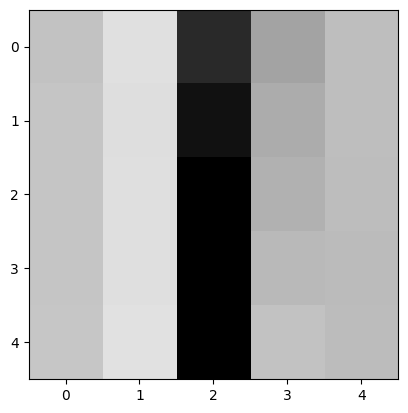

In [4]:
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочка картинки:")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")

Пример картинки:
y_train [shape (60000,)] 10 примеров:
 [9 0 0 3 0 2 7 2 5 5]


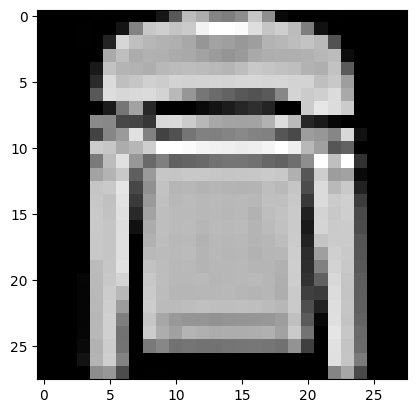

In [5]:
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

In [6]:
# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [9 0 0 3 0]


# Build the model

In [23]:
K.clear_session()

# В этот раз используем картинку как вход без вытягивания в вектор

model = M.Sequential()
model.add(L.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(L.MaxPool2D())
model.add(L.Conv2D(filters=32, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Conv2D(filters=64, kernel_size=3, strides=1, padding='same'))
model.add(L.MaxPool2D())
model.add(L.Flatten())
model.add(L.Dense(64, activation='elu'))
model.add(L.Dense(10, activation='softmax'))

In [24]:
3 * 3 * 64

576

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [26]:
model.compile(
    loss='categorical_crossentropy', # минимизируем кросс-энтропию
    optimizer='adam', # так будет быстрее
    metrics=['accuracy'] # выводим процент правильных ответов
)

In [34]:
# x_train_float[:, :, :, np.newaxis].shape
x_train_float.shape

(60000, 28, 28)

In [29]:
# центрируем и нормируем, так сети будет проще учиться
x_train_float = x_train.astype(np.float64) / 255 - .5
x_val_float = x_val.astype(np.float64) / 255 - .5

In [36]:
history = model.fit(
    x_train_float[:, :, :, np.newaxis],
    y_train_oh,
    batch_size=32,
    epochs=5,
    validation_data=(x_val_float[:, :, :, np.newaxis], y_val_oh)
)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0998 - accuracy: 0.9607 - val_loss: 0.3449 - val_accuracy: 0.9105
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0899 - accuracy: 0.9655 - val_loss: 0.3639 - val_accuracy: 0.9095
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0819 - accuracy: 0.9683 - val_loss: 0.4036 - val_accuracy: 0.9079
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0754 - accuracy: 0.9718 - val_loss: 0.4244 - val_accuracy: 0.9053
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0712 - accuracy: 0.9730 - val_loss: 0.4410 - val_accuracy: 0.9081


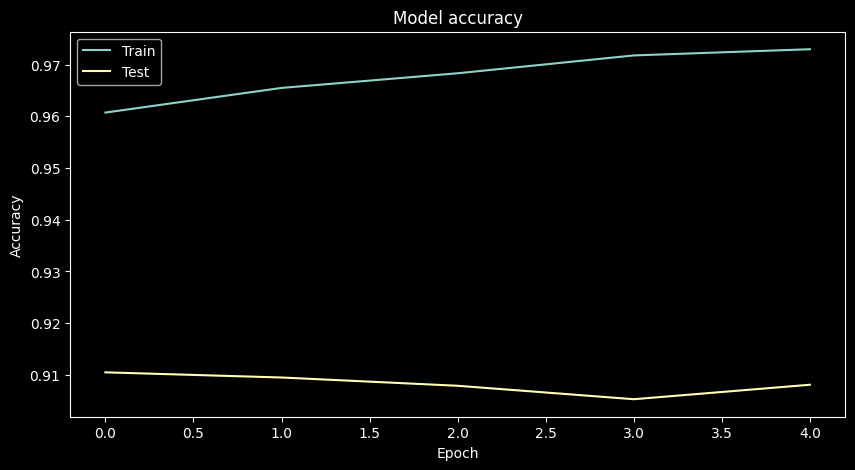

In [38]:
# Plot trainig & validation accuracy values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

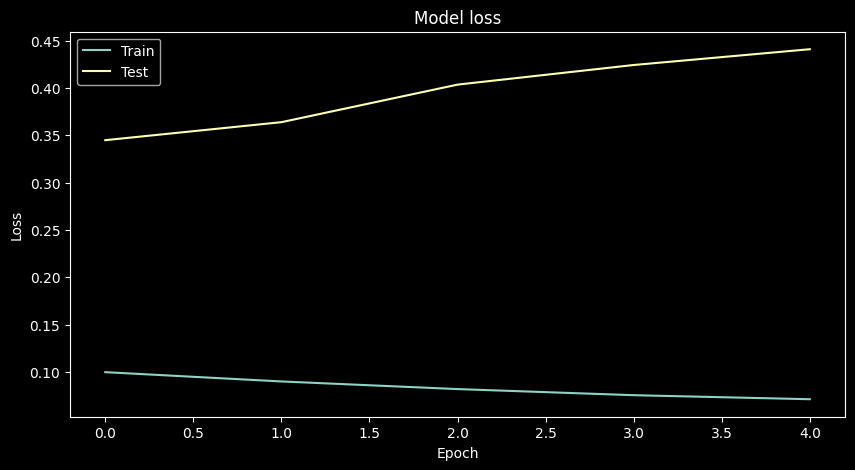

In [39]:
# Plot trainig & validation loss values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
model.predict(x_val_float)

313/313 [==============================] - 1s 2ms/step


array([[2.5433264e-20, 2.2085579e-14, 2.3681566e-19, ..., 1.3991643e-10,
        2.1571479e-12, 1.0000000e+00],
       [2.8534799e-09, 4.6643223e-17, 1.0000000e+00, ..., 2.8517486e-21,
        3.4347649e-21, 6.3447002e-19],
       [3.6348819e-38, 1.0000000e+00, 3.0578189e-31, ..., 0.0000000e+00,
        0.0000000e+00, 2.0842043e-36],
       ...,
       [1.9847876e-16, 1.5384682e-20, 3.5092890e-14, ..., 6.7735518e-21,
        1.0000000e+00, 3.8372864e-21],
       [1.4375655e-34, 1.0000000e+00, 6.5471960e-28, ..., 3.8021305e-34,
        7.0578293e-34, 7.4636173e-30],
       [3.3526588e-11, 7.0886946e-10, 4.8325813e-08, ..., 9.9017870e-01,
        6.3052754e-09, 2.1407891e-10]], dtype=float32)